# Simulación

## Modelo A
### Paso 1

Ecuaciones empleadas:
$$\frac{\mu}{\rho} = \sigma\frac{N_A}{w} = \sigma n$$

$$\mu = \frac{\mu}{\rho}\rho$$
$\frac{\mu}{\rho}$ es un valor conocido tomado de NIST https://physics.nist.gov/cgi-bin/Xcom/xcom2?Method=Comp&Output2=Hand

A continuación se definen los parámetros necesarios para la simulación

In [1]:
# Simulación de una particula que entra a un detector de NaI de 3x3x3 in^3
import numpy as np
import matplotlib.pyplot as plt

# Datos del detector
t = 3 # in Longitud del detector
t = t*2.54 # cm

# Datos del NaI tomados de 

rho = 3.7 # g/cm^3 Densidad del NaI
N_A = 6.022e23 # Numero de Avogadro
w = 150 # g/mol Peso molecular del NaI

r_e = 2.81794e-13 # cm Radio clasico del electron
m_e = 511 # keV Masa del electron


E = 662; # keV

# Coeficiente masico de atenuacion g^-1 cm^2 para NaI a 662 keV con dispersión coherente
mu_rho = 7.395e-2 # Tomado de NIST https://physics.nist.gov/cgi-bin/Xcom/xcom2?Method=Comp&Output2=Hand

mu = mu_rho*rho # Coeficiente de atenuacion cm^-1


# Probabilidad de interaccion

p_int = 1-np.exp(-mu*t)
p_no_int = np.exp(-mu*t)

pdf1 = np.array([p_no_int,p_int])
cdf1 = np.cumsum(pdf1)

interaccion = [False,True]

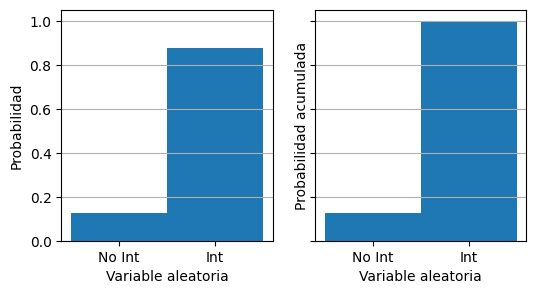

In [2]:
# Grafica de la distribucion de probabilidad y la funcion de distribucion acumulada
fig, axs = plt.subplots(1, 2, figsize=(6,3), sharey=True)

axs[0].bar([0.5, 1.5], pdf1, width=1, align='center')
axs[0].set_xticks([0.5, 1.5])
axs[0].set_xticklabels(['No Int', 'Int'])
axs[0].set_ylabel('Probabilidad')
axs[0].set_xlabel('Variable aleatoria')
axs[0].grid(axis='y')

axs[1].bar([0.5, 1.5], cdf1, width=1, align='center')
axs[1].set_xticks([0.5, 1.5])
axs[1].set_xticklabels(['No Int', 'Int'])
axs[1].set_ylabel('Probabilidad acumulada')
axs[1].set_xlabel('Variable aleatoria')
axs[1].grid(axis='y')

plt.show()


### Paso 2

Se calculan los coeficientes de atenuación para las interacciones

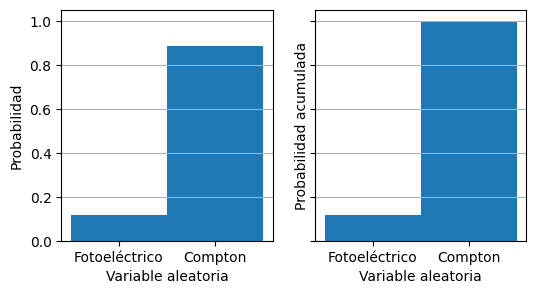

In [3]:
# Absorcion fotoelectrica g^-1 cm^2 para NaI a 662 keV
mu_f_rho = 8.544e-3 # Tomado de NIST https://physics.nist.gov/cgi-bin/Xcom/xcom2?Method=Comp&Output2=Hand 
#mu_c_rho = 6.540e-2 # Tomado de NIST https://physics.nist.gov/cgi-bin/Xcom/xcom2?Method=Comp&Output2=Hand
#mu/rho = 7.662E-02
#mu_f/rho = 8.544E-03
#mu_c/rho = 6.540E-02
mu_f = mu_f_rho*rho # Coeficiente de atenuacion cm^-1
mu_c = mu-mu_f


p_f = mu_f/mu # Probabilidad de absorcion fotoelectrica
p_c = mu_c/mu # Probabilidad de absorcion compton

pdf2 = np.array([p_f,p_c])
cdf2 = np.cumsum(pdf2)
compton = [False,True]

# Grafica de la distribucion de probabilidad y la funcion de distribucion acumulada

fig, axs = plt.subplots(1, 2, figsize=(6,3), sharey=True)

axs[0].bar([0.5, 1.5], pdf2, width=1, align='center')
axs[0].set_xticks([0.5, 1.5])
axs[0].set_xticklabels(['Fotoeléctrico', 'Compton'])
axs[0].set_ylabel('Probabilidad')
axs[0].set_xlabel('Variable aleatoria')
axs[0].grid(axis='y')

axs[1].bar([0.5, 1.5], cdf2, width=1, align='center')
axs[1].set_xticks([0.5, 1.5])
axs[1].set_xticklabels(['Fotoeléctrico', 'Compton'])
axs[1].set_ylabel('Probabilidad acumulada')
axs[1].set_xlabel('Variable aleatoria')
axs[1].grid(axis='y')

plt.show()




### Paso 3
En la ejecución de simulación
### Paso 4

$$\epsilon_e = \frac{E_e}{E_{\gamma}}$$
$$\epsilon_{\gamma} = \frac{E_{\gamma}}{m_e c^2}$$

$$E_e = E_{\gamma}\frac{\epsilon_\gamma(1-\cos\theta)}{1+\epsilon_\gamma(1-\cos\theta)}$$

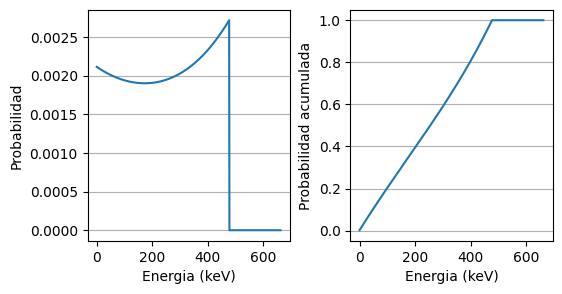

In [4]:
canal = np.arange(0, E+1, 1) # Canal del espectro

#Calibración de canal energia
a_1 = 1 # keV/Canal
a_0 = 0 # keV
energia_cf3 = a_1*canal + a_0 # keV
theta = np.arange(0, np.pi, np.pi/(E+1)) # Angulo de dispersion

e_g = E/511 # Energia de la particula en unidades de masa electronica
cte = e_g*(1-np.cos(theta))
e_e = cte/(1+cte) # Energia de la particula despues de la dispersion
e_e = energia_cf3/E # Energia de la particula despues de la dispersion

Ec = E*2*e_g/(1+2*e_g) # Energia de borde Compton

# Funcion de distribucion de probabilidad de la energia de la particula despues de la dispersion

dsdE = np.pi*r_e**2/(m_e*e_g**2)*(2+((e_e**2)/(e_g**2/(1+e_e)**2))+e_e/(1+e_e)*(e_e-2/e_g))
dsdE_chopped = [0 if i >= Ec else j for i,j in zip(energia_cf3,dsdE)]
pdf3 = dsdE_chopped/np.sum(dsdE_chopped)

# Funcion de distribucion acumulada de la energia de la particula despues de la dispersion

cdf3 = np.cumsum(pdf3)

# Grafica de la distribucion de probabilidad y la funcion de distribucion acumulada

fig, axs = plt.subplots(1, 2, figsize=(6,3))

axs[0].plot(energia_cf3, pdf3)
axs[0].set_ylabel('Probabilidad')
axs[0].set_xlabel('Energia (keV)')
axs[0].grid(axis='y')

axs[1].plot(energia_cf3, cdf3)
axs[1].set_ylabel('Probabilidad acumulada')
axs[1].set_xlabel('Energia (keV)')
axs[1].grid(axis='y')

fig.subplots_adjust(wspace=0.3)
plt.show()





### Paso 5
La función `simulacion_fotopico` genera un número aleatorio a partir de una distribución normal (también conocida como distribución gaussiana) con una media y desviación estándar especificadas. Esto se hace para que, dado un valor de energía, se simule el efecto del FWHM en el detector.

Los parámetros de la función son:

- `mu`: La media de la distribución normal.
- `FWHM`: El ancho a la mitad del máximo de la distribución. Este es un parámetro opcional.
- `sigma`: La desviación estándar de la distribución. Este es un parámetro opcional.

La función primero verifica si se han proporcionado tanto `FWHM` como `sigma`. Si es así, imprime un mensaje de error y retorna, ya que solo se debe proporcionar uno de ellos.

Si no se proporciona ninguno de los dos, la función simplemente retorna `mu`.

Si se proporciona `FWHM`, la función calcula `sigma` como `FWHM/2.35`. Esto se debe a que en una distribución normal, el FWHM es aproximadamente 2.35 veces la desviación estándar.

Finalmente, la función retorna un número aleatorio generado a partir de una distribución normal con media `mu` y desviación estándar `sigma`. Esto se hace usando la función `np.random.normal`.

In [5]:
# Simulación de fotopico en distribución gaussiana

def simulacion_fotopico(mu, FWHM=None, sigma=None):
    if FWHM is not None and sigma is not None:
        print('Error: Debe ingresar solo un valor de FWHM o sigma')
        return
    elif FWHM is None and sigma is None:
        return mu
    elif FWHM is not None:
        sigma = FWHM/2.35

    return np.random.normal(mu, sigma, 1)


#### Función para la rutina de simulación
La función `simulacion_interaccion_A` simula una interacción de partículas con energía `e_gamma` en un detector. La función toma tres argumentos: `e_gamma`, `energias` y `FWHM`.

- `e_gamma` es la energía de la partícula que interactúa con el detector.
- `energias` es un array de energías para las cuales se calcula la respuesta del detector.
- `FWHM` es un array opcional de valores de FWHM para cada energía en `energias`.

La función genera tres números aleatorios `rnd1`, `rnd2` y `rnd3` entre 0 y 1. Luego, utiliza estos números para seleccionar índices `idx`, `jdx` y `kdx` de los arrays `cdf1`, `cdf2` y `cdf3`, respectivamente. Estos arreglos contienen las funciones de distribución acumulada de interacción, tipo de interacción e interacción Compton, respectivamente.

Si la interacción en `idx` es verdadera, entonces se verifica si la interacción en `jdx` es verdadera. Si es así, se selecciona una energía de `energia_cf3` en el índice `kdx` y se busca este valor en el array `energias`. Si el índice resultante es igual a la longitud de `energias`, se reduce en 1 para evitar un error de índice fuera de rango.

Luego, si se proporcionó el array `FWHM`, se llama a la función `simulacion_fotopico` con la energía seleccionada y su correspondiente valor `FWHM`. Si `FWHM` no se proporcionó, se llama a `simulacion_fotopico` solo con la energía seleccionada.

Si la interacción en `jdx` no es verdadera, se realiza un proceso similar, pero utilizando `e_gamma` en lugar de una energía seleccionada de `energia_cf3`.

Si la interacción en `idx` no es verdadera, la función retorna 0. Esto probablemente representa un caso en el que no ocurre ninguna interacción.

In [6]:
 
def simulacion_interaccion_A(e_gamma, energias, FWHM=None):
    rnd1 = np.random.rand(1)
    idx = np.searchsorted(cdf1, rnd1)[0]
    if interaccion[idx]:
        rnd2 = np.random.rand(1)
        jdx = np.searchsorted(cdf2, rnd2)[0]
        if compton[jdx]:
            rnd3 = np.random.rand(1)
            kdx = np.searchsorted(cdf3, rnd3)[0]
            index = np.searchsorted(energias,energia_cf3[kdx])
            if index == len(energias):
                index = index-1
            if FWHM is not None:
                return simulacion_fotopico(energias[index], FWHM[index])
            else:
                return simulacion_fotopico(energias[index])
        else:
            if FWHM is not None:
                ldx = np.searchsorted(energias,e_gamma)
                if ldx == len(energias):
                    ldx = ldx-1
                return simulacion_fotopico(e_gamma, FWHM[ldx])
            else:
                return simulacion_fotopico(e_gamma)
    else:
        return 0

#### Ejecución rutina de simulación

La función `simulacion` simula un espectro de energía detectado en un experimento de física de partículas.

- `N`: Es el número de interacciones que se van a simular.
- `e_gamma`: Es la energía de las partículas que interactúan con el detector.
- `energias`: Es un array de energías para las cuales se calcula la respuesta del detector.
- `FWHM`: Es un array opcional de FWHM para cada energía en `energias`.

La función inicializa un array de ceros `e_detectada` del mismo tamaño que `energias`. Este array almacenará el número de veces que se detecta cada energía.

Luego, la función entra en un bucle que se ejecuta `N` veces. En cada iteración del bucle, se simula una interacción llamando a la función `simulacion_interaccion_A` con `e_gamma`, `energias` y `FWHM` como argumentos. El resultado de esta simulación es una energía `e`.

Si `e` es mayor que cero (lo que significa que se detectó una interacción), la función busca el índice en `energias` donde debería insertarse `e` para mantener el orden del array. Este índice se almacena en `idx`.

Si `idx` es menor que la longitud de `energias` (lo que significa que `e` no es mayor que la energía más alta en `energias`), la función incrementa el valor correspondiente en `e_detectada` en uno. Esto registra que se detectó una partícula con energía `e`.

Finalmente, después de que se han simulado todas las interacciones, la función retorna `e_detectada`, que es un array que representa el espectro de energía detectado en la simulación.

In [7]:
# Simulación de espectro
def simulacion(N, e_gamma, energias, FWHM=None):
    e_detectada = np.zeros(len(energias))
    e = 0
    for i in range(int(N)):
        e = simulacion_interaccion_A(e_gamma, energias, FWHM)
        if e > 0:
            idx = np.searchsorted(energias, e)
            if idx < len(energias):
                e_detectada[idx] += 1
    return e_detectada

### Punto 5 y 6 Modelo A
Este código realiza una calibración de canal de energía para un espectro.

- `a_0` y `a_1` son los coeficientes de una ecuación lineal que se usa para convertir entre el número de canal y la energía de las partículas detectadas. En este caso, la ecuación es $E = a_1 * \text{canal} + a_0$.

- `max_canal` es el número máximo de canal que se considerará.

- `E_max` es la energía máxima que se considerará, calculada usando la ecuación lineal mencionada anteriormente.

- `canalesA1` es un array de números de canal, que van desde 0 hasta `max_canal`.

- `energiasA1` es un array de energías, calculadas para cada número de canal usando la ecuación lineal.

- `FWHM` es un array de FWHM, calculados para cada energía. En este caso, se usa una ecuación empírica $\mathrm{FWHM}=1.87\sqrt{E}-7.93$ para calcular el FWHM a partir de la energía.

- Finalmente, el código asegura que ningún valor de FWHM sea negativo. Si un valor de FWHM calculado es negativo, se reemplaza por 0.1.

In [8]:
# Calibración de canal energia
a_0 = 0 # keV
a_1 = 1 # keV/Canal
max_canal = 1000 # Canal maximo
E_max = a_1*max_canal + a_0 # Energia maxima
canalesA1 = np.arange(0, max_canal+1, 1) # Canal del espectro
energiasA1 = a_1*canalesA1 + a_0 # Energia del espectro
FWHM = 1.8727*np.sqrt(energiasA1)-7.9276 # FWHM del espectro para cada energia
FWHM = [0.1 if i <= 0 else i for i,j in zip(FWHM,energiasA1)] # FWHM no puede ser negativo


#### Simulación de la detección de fotones.

- `e_detec_A_1` y `e_detec_A_2` son arrays que representan el espectro de energía detectado en la simulación. Cada uno se calcula llamando a la función `simulacion` con diferentes argumentos.

- En la primera llamada a `simulacion`, se pasa `N`, `E` y `energiasA1` como argumentos. Esto simula la detección de `N` fotones con energía `E`, y calcula el espectro de energía detectado para las energías en `energiasA1` sin simular el efecto de `FWHM`.

- En la segunda llamada a `simulacion`, se pasa `N`, `E`, `energiasA1` y `FWHM` como argumentos. Esto hace lo mismo que la primera llamada, pero también tiene en cuenta el FWHM de la respuesta del detector para cada energía. Esto simular el ensanchamiento de los picos en el espectro de energía debido a la resolución finita del detector.

In [9]:
N = 1e6 # Numero de fotones
e_detec_A_1 = simulacion(N, E, energiasA1)
e_detec_A_2 = simulacion(N, E, energiasA1, FWHM)

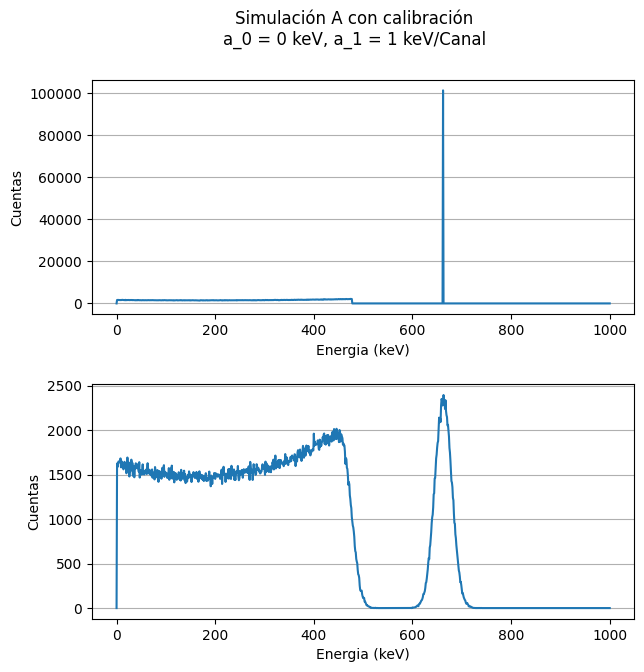

In [10]:

# Grafica del espectro de energia detectada
fig, axs = plt.subplots(2, 1, figsize=(7,7))

axs[0].plot(energiasA1, e_detec_A_1)
axs[0].set_ylabel('Cuentas')
axs[0].set_xlabel('Energia (keV)')
axs[0].grid(axis='y')

axs[1].plot(energiasA1, e_detec_A_2)
axs[1].set_ylabel('Cuentas')
axs[1].set_xlabel('Energia (keV)')
axs[1].grid(axis='y')

fig.subplots_adjust(hspace=0.3)
fig.suptitle('Simulación A con calibración\na_0 = 0 keV, a_1 = 1 keV/Canal')
plt.show()




### Punto 7 Modelo A


Se realiza la calibración canal energía ahora con otros parámetros para $a_0$ y $a_1$ obtenidos experimentalmente para realizar la simulación

In [11]:
# Calibración de canal energia
#Resultados de los parametros de la recta de ajuste:
#a0 (keV)	        a1(keV/canal)
#-55.19 +/- 3.26	3.20 +/- 0.01
a_0 = -55.1872 # keV
a_1 = 3.1969 # keV/Canal
max_canal = 400 # Canal maximo
E_max = a_1*max_canal + a_0 # Energia maxima
canalesA3 = np.arange(0, max_canal+1, 1) # Canal del espectro
energiasA3 = [0 if i <= -a_0/a_1 else a_1*i+a_0 for i in canalesA3] # Energia no puede ser negativo
FWHM = 1.8727*np.sqrt(energiasA3)-7.9276 # FWHM del espectro para cada energia
FWHM = [0.1 if i <= 0 else i for i,j in zip(FWHM,energiasA3)] # FWHM no puede ser negativo


Se realizan `N` simulaciones de fotones de energia `E`

In [12]:
e_detec_A_3 = simulacion(N, E, energiasA3)
e_detec_A_4 = simulacion(N, E, energiasA3, FWHM)

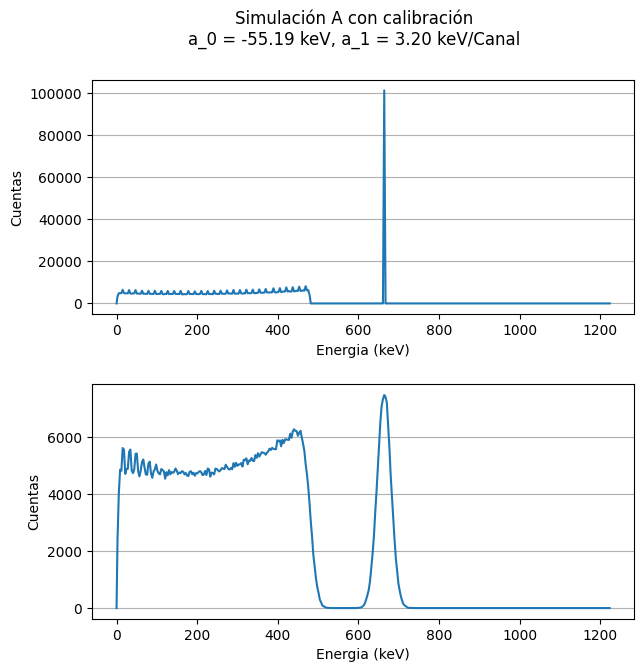

In [13]:
# Grafica del espectro de energia detectada
fig, axs = plt.subplots(2, 1, figsize=(7,7))

axs[0].plot(energiasA3, e_detec_A_3)
axs[0].set_ylabel('Cuentas')
axs[0].set_xlabel('Energia (keV)')
axs[0].grid(axis='y')

axs[1].plot(energiasA3, e_detec_A_4)
axs[1].set_ylabel('Cuentas')
axs[1].set_xlabel('Energia (keV)')
axs[1].grid(axis='y')

fig.subplots_adjust(hspace=0.3)
fig.suptitle('Simulación A con calibración\na_0 = -55.19 keV, a_1 = 3.20 keV/Canal')
plt.show()




## Modelo B

Se calculan las funciones de distribución de probabilidad y acumulada con la información para el modelo B normalizado a 1

In [14]:
mu_f =(8.544E-03)*rho
mu_c = (6.540E-02)*rho

p_c = 0.5-(0.5)*np.exp(-mu_c*t)
p_f = 0.5-(0.5)*np.exp(-mu_f*t)
p_0= (np.exp(-mu_f*t) + np.exp(-mu_c*t))*0.5

pdf4 = np.array([p_f,p_c,p_0])
cdf4 = np.cumsum(pdf4)

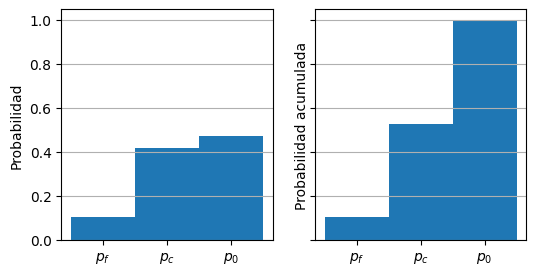

In [15]:
# Grafica de la distribucion de probabilidad y la funcion de distribucion acumulada
fig, axs = plt.subplots(1, 2, figsize=(6,3), sharey=True)

axs[0].bar([0.5, 1.5,2.5], pdf4, width=1, align='center')
axs[0].set_xticks([0.5, 1.5,2.5])
axs[0].set_xticklabels([r'$p_{f}$', r'$p_{c}$',  r'$p_{0}$'])
axs[0].set_ylabel('Probabilidad')
axs[0].grid(axis='y')

axs[1].bar([0.5, 1.5,2.5], cdf4, width=1, align='center')
axs[1].set_xticks([0.5, 1.5,2.5])
axs[1].set_xticklabels([r'$p_{f}$', r'$p_{c}$',  r'$p_{0}$'])
axs[1].set_ylabel('Probabilidad acumulada')
axs[1].grid(axis='y')

plt.show()

#### Simulación con el modelo B

La función `simulacion_interaccion_B` simula una interacción de partículas con energía `e_gamma` en un detector. La función toma tres argumentos: `e_gamma`, `energias` y `FWHM`.

- `e_gamma` es la energía de la partícula que interactúa con el detector.
- `energias` es un array de energías para las cuales se calcula la respuesta del detector.
- `FWHM` es un array opcional de valores de Full Width at Half Maximum (ancho a la mitad del máximo) para cada energía en `energias`.

La función genera un número aleatorio `rnd1` entre 0 y 1. Luego, utiliza este número para seleccionar un índice `idx` del array `cdf4`. Este array `cdf4` es la función de distribución acumulativa (CDF) que representa las interacciones Compton, fotoeléctrica y el caso en el que no hay interacción.

Si `idx` es 0, la función simula una interacción fotopico. Si se proporcionó el array `FWHM`, se llama a la función `simulacion_fotopico` con `e_gamma` y su correspondiente valor `FWHM`. Si `FWHM` no se proporcionó, se llama a `simulacion_fotopico` solo con `e_gamma`.

Si `idx` es 1, la función genera otro número aleatorio `rnd2` y selecciona un índice `jdx` del array `cdf3`. Luego, busca el valor de `energia_cf3[jdx]` en el array `energias` y obtiene el índice correspondiente `index`. Luego, simula una interacción fotopico para la energía en `energias[index]`, de manera similar a como se hizo cuando `idx` era 0.

Si `idx` no es ni 0 ni 1, la función retorna 0 que representa un caso en el que no ocurre ninguna interacción.

In [16]:
def simulacion_interaccion_B (e_gamma, energias, FWHM=None):
    rnd1 = np.random.rand(1)
    idx = np.searchsorted(cdf4, rnd1)[0]
    if idx == 0:
        if FWHM is not None:
            ldx = np.searchsorted(energias,e_gamma)
            if ldx == len(energias):
                ldx = ldx-1
            return simulacion_fotopico(e_gamma, FWHM[ldx])
        else:
            return simulacion_fotopico(e_gamma)
    elif idx == 1:
        rnd2 = np.random.rand(1)
        jdx = np.searchsorted(cdf3, rnd2)[0]
        index = np.searchsorted(energias,energia_cf3[jdx])
        if FWHM is not None:
            return simulacion_fotopico(energias[index], FWHM[index])
        else:
            return simulacion_fotopico(energias[index])
    else:
        return 0


#### Ejecución de la rutina de simulación

La función `simulacion_B` simula un espectro de energía con el modelo B con los mismos parámetros del modelo A.

La función inicializa un array de ceros `e_detectada` del mismo tamaño que `energias`. Este array almacenará el número de veces que se detecta cada energía.

Luego, la función entra en un bucle que se ejecuta `N` veces. En cada iteración del bucle, se simula una interacción llamando a la función `simulacion_interaccion_B` con `e_gamma`, `energias` y `FWHM` como argumentos. El resultado de esta simulación es una energía `e`.

Si `e` es mayor que cero (lo que significa que se detectó una interacción), la función busca el índice en `energias` donde debería insertarse `e` para ubicarlo con su energía respectiva. Este índice se almacena en `idx`.

Si `idx` es menor que la longitud de `energias` (lo que significa que `e` no es mayor que la energía más alta en `energias`), la función incrementa el valor correspondiente en `e_detectada` en uno. Esto registra que se detectó una partícula con energía `e`.

Finalmente, después de que se han simulado todas las interacciones, la función retorna `e_detectada`, que es un array que representa el espectro de energía detectado en la simulación.

In [17]:
def simulacion_B(N, e_gamma, energias, FWHM=None):
    e_detectada = np.zeros(len(energias))
    e = 0
    for i in range(int(N)):
        e = simulacion_interaccion_B(e_gamma, energias, FWHM)
        if e > 0:
            idx = np.searchsorted(energias, e)
            if idx < len(energias):
                e_detectada[idx] += 1
    return e_detectada

### Punto 5 y 6 modelo B

#### Calibración canal energía

Se realiza la calibración de canal energía de la misma manera que para el modelo A

In [18]:
# Calibración de canal energia
a_0 = 0 # keV
a_1 = 1 # keV/Canal
max_canal = 1000 # Canal maximo
E_max = a_1*max_canal + a_0 # Energia maxima
canalesB1 = np.arange(0, max_canal+1, 1) # Canal del espectro
energiasB1 = a_1*canalesB1 + a_0 # Energia del espectro
FWHM = 1.8727*np.sqrt(energiasB1)-7.9276 # FWHM del espectro para cada energia
FWHM = [0.1 if i <= 0 else i for i,j in zip(FWHM,energiasB1)] # FWHM no puede ser negativo


#### Simulación de detección de fotones
- `e_detec_B_1` y `e_detec_B_2` son arrays que representan el espectro de energía detectado en la simulación. Cada uno se calcula llamando a la función `simulacion_B` con diferentes argumentos.

- En la primera llamada a `simulacion_B`, se pasa `N`, `E` y `energiasB1` como argumentos. Esto simula la detección de `N` partículas con energía `E`, y calcula el espectro de energía detectado para las energías en `energiasB1`.

- En la segunda llamada a `simulacion_B`, se pasa `N`, `E`, `energiasB1` y `FWHM` como argumentos. Esto hace lo mismo que la primera llamada, pero también tiene en cuenta el FWHM de la respuesta del detector para cada energía.

In [19]:
e_detec_B_1 = simulacion_B(N, E, energiasB1)
e_detec_B_2 = simulacion_B(N, E, energiasB1, FWHM)

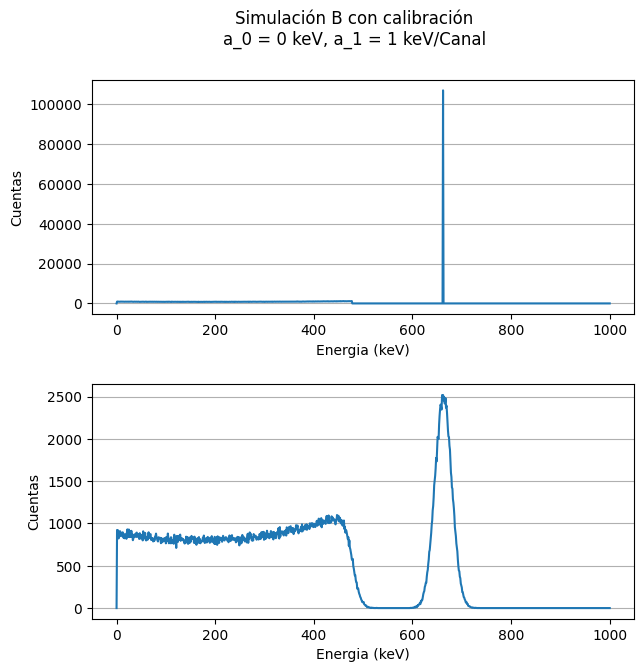

In [20]:
# Grafica del espectro de energia detectada
fig, axs = plt.subplots(2, 1, figsize=(7,7))

axs[0].plot(energiasB1, e_detec_B_1)
axs[0].set_ylabel('Cuentas')
axs[0].set_xlabel('Energia (keV)')
axs[0].grid(axis='y')

axs[1].plot(energiasB1, e_detec_B_2)
axs[1].set_ylabel('Cuentas')
axs[1].set_xlabel('Energia (keV)')
axs[1].grid(axis='y')

fig.subplots_adjust(hspace=0.3)
fig.suptitle('Simulación B con calibración\na_0 = 0 keV, a_1 = 1 keV/Canal')
plt.show()

### Punto 7 Modelo B
Se realiza la calibración canal energía ahora con otros parámetros para $a_0$ y $a_1$ obtenidos experimentalmente para realizar la simulación

In [21]:
# Calibración de canal energia
#Resultados de los parametros de la recta de ajuste:
#a0 (keV)	        a1(keV/canal)
#-55.19 +/- 3.26	3.20 +/- 0.01
a_0 = -55.1872 # keV
a_1 = 3.1969 # keV/Canal
max_canal = 400 # Canal maximo
E_max = a_1*max_canal + a_0 # Energia maxima
canalesB2 = np.arange(0, max_canal+1, 1) # Canal del espectro
energiasB2 = [0 if i <= -a_0/a_1 else a_1*i+a_0 for i in canalesB2] # Energia no puede ser negativo
FWHM = 1.8727*np.sqrt(energiasB2)-7.9276 # FWHM del espectro para cada energia
FWHM = [0.1 if i <= 0 else i for i,j in zip(FWHM,energiasB2)] # FWHM no puede ser negativo


Se realizan `N` simulaciones de fotones de energia `E`

In [22]:
e_detec_B_3 = simulacion_B(N, E, energiasB2)
e_detec_B_4 = simulacion_B(N, E, energiasB2, FWHM)

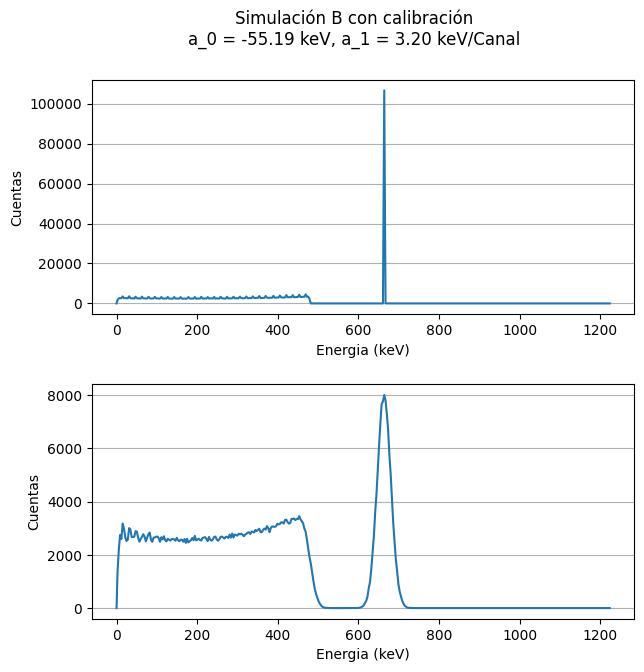

In [23]:
# Grafica del espectro de energia detectada
fig, axs = plt.subplots(2, 1, figsize=(7,7))

axs[0].plot(energiasB2, e_detec_B_3)
axs[0].set_ylabel('Cuentas')
axs[0].set_xlabel('Energia (keV)')
axs[0].grid(axis='y')

axs[1].plot(energiasB2, e_detec_B_4)
axs[1].set_ylabel('Cuentas')
axs[1].set_xlabel('Energia (keV)')
axs[1].grid(axis='y')

fig.subplots_adjust(hspace=0.3)
fig.suptitle('Simulación B con calibración\na_0 = -55.19 keV, a_1 = 3.20 keV/Canal')
plt.show()

Esta sección de código está guardando los resultados de las simulaciones de detección de partículas en varios archivos de texto.

- `np.savetxt` es una función de NumPy que guarda un array en un archivo de texto.
- `'e_detect_A_1.txt'`, `'e_detect_A_2.txt'`, etc., son los nombres de los archivos donde se guardarán los resultados.
- `np.column_stack((canalesA1, energiasA1, e_detec_A_1))`, `np.column_stack((canalesA1, energiasA1, e_detec_A_2))`, etc., son los datos que se guardarán en los archivos. `np.column_stack` toma una secuencia de arrays 1D y los apila en un único array 2D, donde cada array 1D se convierte en una columna del array 2D.
- `fmt='%d %.2f %.2f'` especifica el formato en el que se guardarán los datos. `%d` es para enteros y `%.2f` es para números de punto flotante con dos decimales.
- `header='Channels Energies Detected_Value'` especifica la cabecera del archivo de texto. Los nombres de las columnas son 'Channels', 'Energies' y 'Detected_Value'.
- `comments=''` especifica el carácter que se utilizará para los comentarios. Al establecerlo en una cadena vacía, se desactivan los comentarios.

In [24]:
# Exporta los datos a archivos de texto
np.savetxt('e_detect_A_1.txt', np.column_stack((canalesA1, energiasA1, e_detec_A_1)), fmt='%d %.2f %.2f', header='Channels Energies Detected_Value', comments='')
np.savetxt('e_detect_A_2.txt', np.column_stack((canalesA1, energiasA1, e_detec_A_2)), fmt='%d %.2f %.2f', header='Channels Energies Detected_Value', comments='')
np.savetxt('e_detect_A_3.txt', np.column_stack((canalesA3, energiasA3, e_detec_A_3)), fmt='%d %.2f %.2f', header='Channels Energies Detected_Value', comments='')
np.savetxt('e_detect_A_4.txt', np.column_stack((canalesA3, energiasA3, e_detec_A_4)), fmt='%d %.2f %.2f', header='Channels Energies Detected_Value', comments='')
np.savetxt('e_detect_B_1.txt', np.column_stack((canalesB1, energiasB1, e_detec_B_1)), fmt='%d %.2f %.2f', header='Channels Energies Detected_Value', comments='')
np.savetxt('e_detect_B_2.txt', np.column_stack((canalesB1, energiasB1, e_detec_B_2)), fmt='%d %.2f %.2f', header='Channels Energies Detected_Value', comments='')
np.savetxt('e_detect_B_3.txt', np.column_stack((canalesB2, energiasB2, e_detec_B_3)), fmt='%d %.2f %.2f', header='Channels Energies Detected_Value', comments='')
np.savetxt('e_detect_B_4.txt', np.column_stack((canalesB2, energiasB2, e_detec_B_4)), fmt='%d %.2f %.2f', header='Channels Energies Detected_Value', comments='')
